In [3]:
import pymysql
import pandas as pd

# Database configuration
DB_CONFIG = {
    "host": "localhost",
    "user": "root",
    "password": "",
    "database": "xyz"
}
# step 1: establish db connection
connection = pymysql.connect(**DB_CONFIG)

# Step 2: Create an SQL query
query = "SELECT * FROM employee;"

# Step 3: Use pandas to load the query result into a DataFrame
df = pd.read_sql(query, connection)

# Step 4: Close the database connection
connection.close()

# Step 5: View the DataFrame
print(df)  # Display the first 5 rows of the DataFrame




   emp_id      emp_name   hire_date  salary           dept_name
0       1    aleo njeri  2021-11-30  120000  mobile development
1       4  joyce atieno  2022-11-01   80000             finance
2       5    ruth njeri  2023-04-05  950000             finance
3       6  william john  2020-02-01  130000    mobile developer
4       7    peter wire  2024-03-01  120000    mobile developer
5       8  mercy akinyi  2021-06-01   70000     human resources
6       9  faith joseph  2023-07-01  100000             finance
7      11          mike  2022-12-23   70000               ux/ui
8      13       jackson  0000-00-00   70000    mobile developer


C:\Users\modcom\AppData\Local\Temp\ipykernel_5024\2346961465.py:18: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connection)


In [4]:
# access our data frame and provide column name as KEY.
df['emp_name']

0      aleo njeri
1    joyce atieno
2      ruth njeri
3    william john
4      peter wire
5    mercy akinyi
6    faith joseph
7            mike
8         jackson
Name: emp_name, dtype: object

In [6]:
# access multiple columns from our data frame.
df[['emp_name','salary','dept_name']]

,emp_name,salary,dept_name
0,aleo njeri,120000,mobile development
1,joyce atieno,80000,finance
2,ruth njeri,950000,finance
3,william john,130000,mobile developer
4,peter wire,120000,mobile developer
5,mercy akinyi,70000,human resources
6,faith joseph,100000,finance
7,mike,70000,ux/ui
8,jackson,70000,mobile developer


In [7]:
# we check if we have empty records in our dataset.
df.isnull().sum()

emp_id       0
emp_name     0
hire_date    0
salary       0
dept_name    0
dtype: int64

In [8]:
# more statistical info of the continous data columns
df.describe()

,emp_id,salary
count,9.000000,9.000000
mean,7.111111,190000.000000
std,3.655285,286006.992922
min,1.000000,70000.000000
25%,5.000000,70000.000000
50%,7.000000,100000.000000
75%,9.000000,120000.000000
max,13.000000,950000.000000


In [10]:
# relationship
columns = df[['salary' ,'emp_id']] 
columns.corr()

,salary,emp_id
salary,1.000000,-0.264244
emp_id,-0.264244,1.000000


In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
# plt.style.available

C:\Users\modcom\AppData\Local\Temp\ipykernel_5024\2523143627.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = df['dept_name'], palette = 'Reds')


Text(0, 0.5, 'Number of Members')

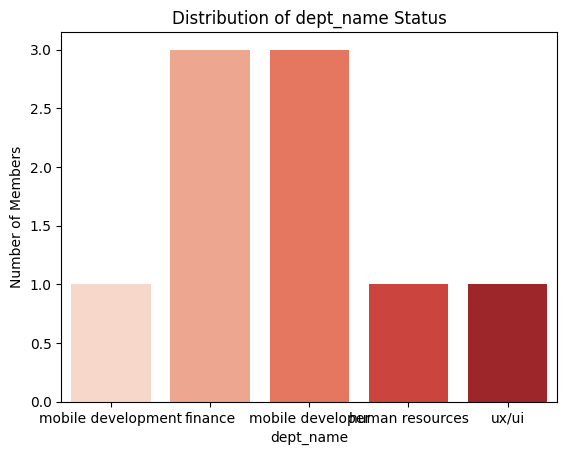

In [13]:
sns.countplot(x = df['dept_name'], palette = 'Reds')
plt.title("Distribution of dept_name Status")
plt.xlabel('dept_name')
plt.ylabel('Number of Members')